In [95]:
import pandas as pd
import numpy as np

In [128]:
data=pd.read_csv("../data/content_polluters_tweets_no_links.txt", delimiter="\t", header=None, dtype=str)
data2=pd.read_csv("../data/legitimate_users_tweets_no_links.txt", delimiter="\t", header=None, dtype=str)

tweets = pd.concat([data,data2])
tweets = tweets.sample(frac=1).reset_index(drop=True)
tweets.to_csv("tweets_shuffled_no_links.csv",sep="\t",header=["userid","tweetid","tweet","created_at","tweet_no_links"], index=False)

In [98]:
tweets.head()

,0,1,2,3,4
0,145052735,15802479121,@allisajacobs apparently not all dark chocolat...,2010-06-09 16:07:45,@allisajacobs apparently not all dark chocolat...
1,105579434,8125189479,"More (Steve) Jobs, Jobs, Jobs, Jobs: ... but l...",2010-01-23 15:55:17,"More (Steve) Jobs, Jobs, Jobs, Jobs: ... but l..."
2,21044418,1331133902,"Ajab nahare topi zadim, nafari 2ta qezel ba mo...",2009-03-15 07:18:41,"Ajab nahare topi zadim, nafari 2ta qezel ba mo..."
3,23745304,5873730898,Palin Confuses Iraq & Iran In Hannity Intervie...,2009-11-19 18:12:39,Palin Confuses Iraq & Iran In Hannity Intervie...
4,20135933,5717111863,"again, thank you for the sanity! RT @sineaddee...",2009-11-14 14:09:58,"again, thank you for the sanity! RT @sineaddee..."


In [48]:
groupedbyuser_tweets=tweets.groupby(["user_id"])

In [49]:
groupedbyuser_tweets

In [103]:
polluter_tweets = "../lda2vec/tweets_shuffled_no_links.csv"
tweets = np.loadtxt(fname=polluter_tweets, delimiter="\t", dtype=str, comments=None, usecols=3)

IndexError: list index out of range

In [102]:
tweets

array([ '@allisajacobs apparently not all dark chocolate is healthy. have you seen this? - http://bit.ly/bkn57b',
       'More (Steve) Jobs, Jobs, Jobs, Jobs: ... but lasting good jobs that keep America on the cutting edge. The best way... http://bit.ly/4Smt7v',
       'Ajab nahare topi zadim, nafari 2ta qezel ba mokhalafat va kolli halva! Alan ham ke deraz keshidim, badesh mirim to bagh!',
       ..., 'Free Book: 101 Romantic Ideas! http://hijw.com/romance',
       "I'm broadcasting my live Stickam stream at http://stickam.com/shannongallup started: Fri, 16:02 PST",
       'Went to Allsop property auction today.  Brilliant! There are real bargins to be had all over the UK.'], 
      dtype='|S420')

In [60]:
ids = []
tweets_per_id = []
num = 0
for name, group in groupedbyuser_tweets:
    ids.append(num)
    tweets_per_id.append(len(group))
    num+=1

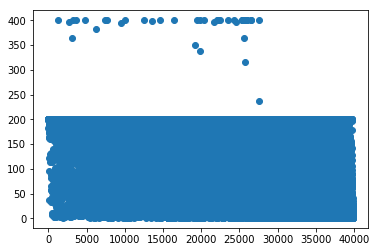

In [61]:
import matplotlib.pyplot as plt
plt.scatter(ids,tweets_per_id)

plt.show()

In [118]:
from gensim.models.keyedvectors import KeyedVectors

id = "../data/honeypot_clean_model_revised"
mymodel = KeyedVectors.load(id)
n_dim = mymodel.wv.syn0.shape[1]

In [127]:
mymodel.wv.most_similar("health")

[(u'healthcare', 0.7320735454559326),
 (u'nutrition', 0.6838242411613464),
 (u'medical', 0.6609572172164917),
 (u'@onlinenursing', 0.6549701690673828),
 (u'yuuuuuks', 0.6467499136924744),
 (u'patients', 0.6411877870559692),
 (u'lifenews.comhealth', 0.635002613067627),
 (u'chiropractic', 0.6319599151611328),
 (u'benefits', 0.6297504901885986),
 (u'healt', 0.6294679641723633)]